In [2]:
#Adding all libraries 
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import copy
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB, ComplementNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
from sklearn.metrics import recall_score,precision_score
from sklearn.neighbors import KNeighborsClassifier
sns.set_style("whitegrid")
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier,VotingClassifier

In [3]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,roc_curve,auc,recall_score,precision_score
)
from sklearn.model_selection import cross_val_score

In [4]:
# Load the all the data from CSV files 
train_data = pd.read_csv('train_part3.csv')
test_data = pd.read_csv('test_part3.csv')
df_original = pd.read_csv('df_original.csv')
df_clean = pd.read_csv('df_clean.csv')
df = pd.read_csv('df_trim.csv')


In [58]:
train_data.head(5)
#We know the age is repeatative but the way it is calculated is different. 
# Vict age is the exact number, 
#vict_age1 is stated bins classifier and 
# vict_age2 is equal frequency classisifer

,Date,Month,Hour,LatLon,Premis Cd,Vict Age,Vict Descent,Crime_Category,Crime_Cat_new
0,7,5,2,5862,727,28,3,1,0
1,28,6,6,35302,210,35,3,1,0
2,28,4,1,10989,502,25,2,0,0
3,1,6,6,17808,101,39,4,1,0
4,7,3,5,2755,101,50,3,0,0


In [14]:
train_data.Crime_Cat_new.value_counts()

Crime_Cat_new
0    161257
1      6898
Name: count, dtype: int64

In [5]:
# Separate features and target variable for training data
x_train = train_data.drop(["Crime_Category","Crime_Cat_new"], axis=1)
y_train = train_data["Crime_Cat_new"]

# Separate features and target variable for testing data
x_test = test_data.drop(["Crime_Category","Crime_Cat_new"], axis=1)
y_test = test_data["Crime_Cat_new"]

In [6]:
#Faced issue earlier that there was discrepancy in the number of rows
#Hence, checking the shape of the datasets. 
print("x_train", x_train.shape)
print("y_train", y_train.shape)
print("x_test", x_test.shape)
print("y_test", y_test.shape)

x_train (168155, 7)
y_train (168155,)
x_test (72067, 7)
y_test (72067,)


In [13]:
df.Crime_cat_new.value_counts()

AttributeError: 'DataFrame' object has no attribute 'Crime_cat_new'

In [61]:
#checking if there are any null values 
x_train.isnull().sum()

Date            0
Month           0
Hour            0
LatLon          0
Premis Cd       0
Vict Age        0
Vict Descent    0
dtype: int64

In [62]:
x_test.isnull().sum()

Date            0
Month           0
Hour            0
LatLon          0
Premis Cd       0
Vict Age        0
Vict Descent    0
dtype: int64

In [8]:
#Creating separate X and Y 
x = df.drop(["Crime_Category","Crime_Cat_new"], axis=1)
y = df.Crime_Cat_new.values

## Data Analysis - Part 1 
In this part, our output category has 6 values. We will perform all analysis for this particular thing. 

In [9]:
#labels & classes 
labels = [0,1]
classes = [0,1]

## Cost Matrix 
cost_matrix = np.array([[30,-20],  # a: Cost of True Positive, b: Cost of False Negative
                        [-5,5]]) # c: Cost of False Positive, d: Cost of True Negative

In [10]:
def plot_confusionmatrix(y_train_pred,y_train,dom):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_train_pred,y_train)
    # When annot is set to True, it adds text annotations to each cell of the heatmap.
    sns.heatmap(cf,annot=True,yticklabels=classes,xticklabels=classes,cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()

### Naive Bayes

In [66]:
'''We will look into Naive Bayes models 
1. Multinomial Naive Bayes - MultinomialNB
2. Gaussian Naive Bayes - GaussianNB
3. Complement Naive Bayes - ComplementNB
4. Bernoulli Naive Bayes - BernoulliNB

'''
#Defining all the models as a dictionary
NB_models = {
    'MultinomialNB': MultinomialNB(),
    'GaussianNB': GaussianNB(),
    'ComplementNB': ComplementNB(),
    'BernoulliNB': BernoulliNB()
}

#for every model in NB model, we will run all the code to calculate everything in one go 
#took reference from ensemble learning code. 

for name, classifier in NB_models.items():
    
    #fit the model to our data 
    classifier.fit(x_train, y_train)
    
    '''Calculating all the predicitons'''
    #Prediction for the testing dataset 
    y_pred = classifier.predict(x_test)
    #Prediction for the training dataset 
    y_pred_train =  classifier.predict(x_train)
    
    #Confusion matrix for calculation 
    cm = confusion_matrix(y_test, y_pred, labels=labels)

    #hashed because I want to evaluate the models faster, can unhash to see the exact confusion matrixes
    #plot_confusionmatrix(y_pred_train,y_train,dom='Train')
    #plot_confusionmatrix(y_pred,y_test,dom='Test')
    
    #Calculating Expected Value 
    EV = np.sum(cm * cost_matrix)
    
    #Calculatinf other scores for comparision 
    #f1_score = f1_score(y_test, y_pred, average='weighted')
    #Recall = recall_score(y_test, y_pred)
    #Precision= precision_score(y_test, y_pred)
    
    print("TEST ACCURACY ",name," is :", accuracy_score(y_test, y_pred))
    print("TRAIN ACCURACY",name," is :", accuracy_score(y_train, y_pred_train))
    print("EXPECTED VALUE ",name," is :", EV)
    print("___________________________")
    #print("F-1 SCORE ",name," is :", f1_score)
    #print("RECALL ",name," is :", Recall)
    #print("PRECISION ",name," is :", Precision)


TEST ACCURACY  MultinomialNB  is : 0.6086974620838942
TRAIN ACCURACY MultinomialNB  is : 0.6085575808034254
EXPECTED VALUE  MultinomialNB  is : 741165
___________________________
TEST ACCURACY  GaussianNB  is : 0.9571926124300998
TRAIN ACCURACY GaussianNB  is : 0.9589783235705153
EXPECTED VALUE  GaussianNB  is : 2054035
___________________________
TEST ACCURACY  ComplementNB  is : 0.5635589104583235
TRAIN ACCURACY ComplementNB  is : 0.5628556986114002
EXPECTED VALUE  ComplementNB  is : 572315
___________________________


TEST ACCURACY  BernoulliNB  is : 0.9571926124300998
TRAIN ACCURACY BernoulliNB  is : 0.9589783235705153
EXPECTED VALUE  BernoulliNB  is : 2054035
___________________________


### Decision Trees

In [67]:
'''
In this section, we will look at decision tree models

1. tree.DecisionTreeClassifier(criterion='gini', random_state=42)
2.  tree.DecisionTreeClassifier(criterion='entropy', random_state=42) 
3.Extremely Randomized Trees
4. Random Forest - RandomForestClassifier(random_state=42)
'''

Tree_models_42 = {
    'GiniTree_NoEstimators' : tree.DecisionTreeClassifier(criterion='gini', random_state=42), 
    'EntropyTree_NoEstimators' : tree.DecisionTreeClassifier(criterion='entropy', random_state=42),
    'RandomForest' : RandomForestClassifier(random_state=42),
    'ExtraTrees_Gini': ExtraTreesClassifier( criterion='gini', random_state=42), 
    'ExtraTrees_Entropy': ExtraTreesClassifier( criterion='entropy', random_state=42), 
       
}

#took reference from ensemble learning code. 

for name, classifier in Tree_models_42.items():
    
    #fit the model to our data 
    classifier.fit(x_train, y_train)
    
    '''Calculating all the predicitons'''
    #Prediction for the testing dataset 
    y_pred = classifier.predict(x_test)
    #Prediction for the training dataset 
    y_pred_train =  classifier.predict(x_train)
    
    #Confusion matrix for calculation 
    cm = confusion_matrix(y_test, y_pred, labels=labels)

    #hashed because I want to evaluate the models faster, can unhash to see the exact confusion matrixes
    #plot_confusionmatrix(y_pred_train,y_train,dom='Train')
    #plot_confusionmatrix(y_pred,y_test,dom='Test')
    
    #Calculating Expected Value 
    EV = np.sum(cm * cost_matrix)
    
    #Calculatinf other scores for comparision 
    #f1_score = f1_score(y_test, y_pred, average='weighted')
    #Recall = recall_score(y_test, y_pred)
    #Precision= precision_score(y_test, y_pred)
    
    print("TEST ACCURACY ",name," is :", accuracy_score(y_test, y_pred))
    print("TRAIN ACCURACY",name," is :", accuracy_score(y_train, y_pred_train))
    print("EXPECTED VALUE ",name," is :", EV)
    print("___________________________")
    #print("F-1 SCORE ",name," is :", f1_score)
    #print("RECALL ",name," is :", Recall)
    #print("PRECISION ",name," is :", Precision)

TEST ACCURACY  GiniTree_NoEstimators  is : 0.9215729806985167
TRAIN ACCURACY GiniTree_NoEstimators  is : 0.9998513276441379
EXPECTED VALUE  GiniTree_NoEstimators  is : 1904565
___________________________
TEST ACCURACY  EntropyTree_NoEstimators  is : 0.9244453078385392
TRAIN ACCURACY EntropyTree_NoEstimators  is : 0.9998513276441379
EXPECTED VALUE  EntropyTree_NoEstimators  is : 1916275
___________________________
TEST ACCURACY  RandomForest  is : 0.9589409854718526
TRAIN ACCURACY RandomForest  is : 0.999791858701793
EXPECTED VALUE  RandomForest  is : 2050895
___________________________
TEST ACCURACY  ExtraTrees_Gini  is : 0.9585940860588064
TRAIN ACCURACY ExtraTrees_Gini  is : 0.9998513276441379
EXPECTED VALUE  ExtraTrees_Gini  is : 2051125
___________________________
TEST ACCURACY  ExtraTrees_Entropy  is : 0.9585247061761971
TRAIN ACCURACY ExtraTrees_Entropy  is : 0.9998513276441379
EXPECTED VALUE  ExtraTrees_Entropy  is : 2051235
___________________________


Up until now, Random forest give us the best results with maximum EV. Now let's try to improve the performances of these models. 

* We will do pre-pruning and post pruning to see improvements. 
* After that for both the types of models, we will perform cross validation. 

In [68]:
params = {
    'max_depth': [2, 4, 6],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2]
}

classifier = tree.DecisionTreeClassifier(criterion='entropy', random_state=42)
gcv = GridSearchCV(estimator=classifier, param_grid=params)
gcv.fit(x_train, y_train)

modelgcv = gcv.best_estimator_
print("Best Fit Model:", modelgcv)

modelgcv.fit(x_train, y_train)

# Predictions
y_pred = modelgcv.predict(x_test)
y_pred_train = modelgcv.predict(x_train)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=labels)

# Calculating Expected Value
EV = np.sum(cm * cost_matrix)

# Calculating other scores
#f1 = f1_score(y_test, y_pred, average='weighted')
#Recall = recall_score(y_test, y_pred, average='weighted')  # Add average='weighted' for multiclass
#Precision = precision_score(y_test, y_pred, average='weighted')  # Add average='weighted' for multiclass

# Printing results
print("TEST ACCURACY is:", accuracy_score(y_test, y_pred))
print("TRAIN ACCURACY is:", accuracy_score(y_train, y_pred_train))
print("EXPECTED VALUE is:", EV)
#print("F-1 SCORE is:", f1)
#print("RECALL is:", Recall)
#print("PRECISION is:", Precision)

Best Fit Model: DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=2,
                       random_state=42)
TEST ACCURACY is: 0.9583165665283694
TRAIN ACCURACY is: 0.9602152775712884
EXPECTED VALUE is: 2050485


In [69]:
# Pre-pruning 
for name, classifier in Tree_models_42.items():
    
    # parameters 
    params = {'max_depth': [2,4,6],
         'min_samples_split': [2,3,4],
         'min_samples_leaf': [2,3]}
    
    
    gcv = GridSearchCV(estimator=classifier,param_grid=params)
    gcv.fit(x_train,y_train)

    modelgcv = gcv.best_estimator_
    print("Best Fit Model for", name, modelgcv)
    

    modelgcv.fit(x_train,y_train)
    
    '''Calculating all the predicitons'''
    #Prediction for the testing dataset 
    y_pred = classifier.predict(x_test)
    #Prediction for the training dataset 
    y_pred_train =  classifier.predict(x_train)
    
    #Confusion matrix for calculation 
    cm = confusion_matrix(y_test, y_pred, labels=labels)

    #hashed because I want to evaluate the models faster, can unhash to see the exact confusion matrixes
    #plot_confusionmatrix(y_pred_train,y_train,dom='Train')
    #plot_confusionmatrix(y_pred,y_test,dom='Test')
    
    #Calculating Expected Value 
    EV = np.sum(cm * cost_matrix)
    
    #Calculatinf other scores for comparision 
    #f1_score = f1_score(y_test, y_pred, average='weighted')
    #Recall = recall_score(y_test, y_pred)
    #Precision= precision_score(y_test, y_pred)
    
    print("TEST ACCURACY ",name," is :", accuracy_score(y_test, y_pred))
    print("TRAIN ACCURACY",name," is :", accuracy_score(y_train, y_pred_train))
    print("EXPECTED VALUE ",name," is :", EV)
    print("___________________________")
    #print("F-1 SCORE ",name," is :", f1_score)
    #print("RECALL ",name," is :", Recall)
    #print("PRECISION ",name," is :", Precision)

Best Fit Model for GiniTree_NoEstimators DecisionTreeClassifier(max_depth=6, min_samples_leaf=3, random_state=42)
TEST ACCURACY  GiniTree_NoEstimators  is : 0.9215729806985167
TRAIN ACCURACY GiniTree_NoEstimators  is : 0.9998513276441379
EXPECTED VALUE  GiniTree_NoEstimators  is : 1904565
___________________________
Best Fit Model for EntropyTree_NoEstimators DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=3,
                       random_state=42)
TEST ACCURACY  EntropyTree_NoEstimators  is : 0.9244453078385392
TRAIN ACCURACY EntropyTree_NoEstimators  is : 0.9998513276441379
EXPECTED VALUE  EntropyTree_NoEstimators  is : 1916275
___________________________
Best Fit Model for RandomForest RandomForestClassifier(max_depth=6, min_samples_leaf=3, random_state=42)
TEST ACCURACY  RandomForest  is : 0.9589409854718526
TRAIN ACCURACY RandomForest  is : 0.999791858701793
EXPECTED VALUE  RandomForest  is : 2050895
___________________________
Best Fit Model for ExtraTre

In [70]:
#Post Pruning 
Tree_models_new = {
    'GiniTree_NoEstimators' : tree.DecisionTreeClassifier(criterion='gini', random_state=42), 
    'EntropyTree_NoEstimators' : tree.DecisionTreeClassifier(criterion='entropy', random_state=42),
    'GiniTree_BestGCV' : tree.DecisionTreeClassifier(criterion='gini',max_depth=6, min_samples_leaf=3, random_state=42), 
    'EntropyTree_BestGCV' : tree.DecisionTreeClassifier(criterion='entropy',max_depth=6, min_samples_leaf=2, random_state=42),
    #'RandomForest' : RandomForestClassifier(random_state=42),
    #'ExtraTrees_Gini': ExtraTreesClassifier( criterion='gini', random_state=42), 
    #'ExtraTrees_Entropy': ExtraTreesClassifier( criterion='entropy', random_state=42), 
       
}
for name, model in Tree_models_new.items():
    path = model.cost_complexity_pruning_path(x_train, y_train)
    ccp_alphas, impurities = path.ccp_alphas, path.impurities
    print(name)
    print(ccp_alphas)
    print(ccp_alphas.shape)
    print(max(ccp_alphas))
    ccp_alphas2 = np.arange(0,max(ccp_alphas),0.001)
    print("______________________")


GiniTree_NoEstimators
[0.00000000e+00 1.69829850e-06 1.91021451e-06 ... 2.72653284e-04
 4.47259026e-04 3.50640291e-03]
(2874,)
0.003506402914424847
______________________
EntropyTree_NoEstimators
[0.00000000e+00 2.91531620e-06 3.70227617e-06 ... 1.54568077e-03
 1.67241892e-03 1.49586709e-02]
(4388,)
0.014958670946649322
______________________
GiniTree_BestGCV
[0.00000000e+00 1.10171181e-06 1.14690103e-06 1.64934065e-06
 1.76656031e-06 2.97344712e-06 3.49979167e-06 4.61600644e-06
 4.80308057e-06 5.17943509e-06 5.22791486e-06 6.12839036e-06
 6.34575464e-06 6.60766026e-06 8.35084170e-06 8.45587997e-06
 8.81660219e-06 8.92160119e-06 9.28318125e-06 1.02420540e-05
 1.03439918e-05 1.04117302e-05 1.08793485e-05 1.11128900e-05
 1.13330141e-05 1.13364718e-05 1.15847470e-05 1.27712543e-05
 1.52262759e-05 1.61429046e-05 1.63510915e-05 2.36628530e-05
 2.49769558e-05 2.58948254e-05 2.64104110e-05 2.75045366e-05
 2.98853884e-05 3.21296753e-05 3.41823924e-05 4.01745518e-05
 4.56573913e-05 4.64262950e-

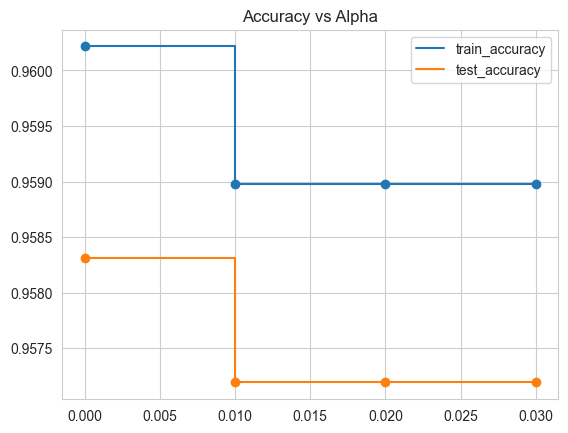

In [71]:
#For Entropy Tree GCV 
ccp_alphas2 = np.arange(0,0.037,0.01)
models = []
for ccp_alpha in ccp_alphas2:
    model = tree.DecisionTreeClassifier(criterion='entropy',max_depth=6, min_samples_leaf=2, random_state=42, ccp_alpha=ccp_alpha)
    model.fit(x_train, y_train)
    models.append(model)
    
#Plotting the CCP alphas and their corresponding accuracy scores
train_acc = []
test_acc  = []
for m in models:
    y_train_pred = m.predict(x_train)
    y_test_pred = m.predict(x_test)
    train_acc.append(accuracy_score(y_train_pred,y_train))
    test_acc.append(accuracy_score(y_test_pred,y_test))

plt.scatter(ccp_alphas2,train_acc)
plt.scatter(ccp_alphas2,test_acc)
plt.plot(ccp_alphas2,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas2,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs Alpha')
plt.show()

In [72]:
#performing post pruning for every model 
# alpha = select
#selecting the alpha and trying out the accuracy and models

classifier = tree.DecisionTreeClassifier(criterion='entropy',max_depth=6, min_samples_leaf=2, random_state=42, ccp_alpha=0)
classifier.fit(x_train,y_train)

#Prediction for the testing dataset 
y_pred = classifier.predict(x_test)
#Prediction for the training dataset 
y_pred_train =  classifier.predict(x_train)

#Confusion matrix for calculation 
cm = confusion_matrix(y_test, y_pred, labels=labels)

#hashed because I want to evaluate the models faster, can unhash to see the exact confusion matrixes
#plot_confusionmatrix(y_pred_train,y_train,dom='Train')
#plot_confusionmatrix(y_pred,y_test,dom='Test')

#Calculating Expected Value 
EV = np.sum(cm * cost_matrix)

#Calculatinf other scores for comparision 
#f1_score = f1_score(y_test, y_pred, average='weighted')
#Recall = recall_score(y_test, y_pred)
#Precision= precision_score(y_test, y_pred)

print("TEST ACCURACY ",name," is :", accuracy_score(y_test, y_pred))
print("TRAIN ACCURACY",name," is :", accuracy_score(y_train, y_pred_train))
print("EXPECTED VALUE ",name," is :", EV)
print("___________________________")
#print("F-1 SCORE ",name," is :", f1_score)
#print("RECALL ",name," is :", Recall)
#print("PRECISION ",name," is :", Precision)

TEST ACCURACY  EntropyTree_BestGCV  is : 0.9583165665283694
TRAIN ACCURACY EntropyTree_BestGCV  is : 0.9602152775712884
EXPECTED VALUE  EntropyTree_BestGCV  is : 2050485
___________________________


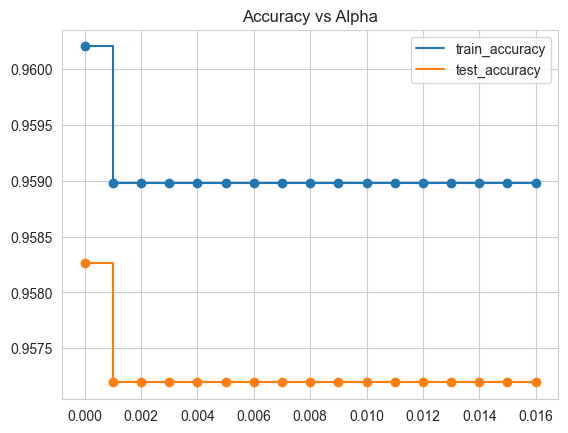

In [73]:
#Gini GCV model
ccp_alphas2 = np.arange(0,0.0167,0.001)
models = []
for ccp_alpha in ccp_alphas2:
    model = tree.DecisionTreeClassifier(criterion='gini',max_depth=6, min_samples_leaf=3, random_state=42, ccp_alpha=ccp_alpha)
    model.fit(x_train, y_train)
    models.append(model)
    
#Plotting the CCP alphas and their corresponding accuracy scores
train_acc = []
test_acc  = []
for m in models:
    y_train_pred = m.predict(x_train)
    y_test_pred = m.predict(x_test)
    train_acc.append(accuracy_score(y_train_pred,y_train))
    test_acc.append(accuracy_score(y_test_pred,y_test))

plt.scatter(ccp_alphas2,train_acc)
plt.scatter(ccp_alphas2,test_acc)
plt.plot(ccp_alphas2,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas2,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs Alpha')
plt.show()

In [74]:
#performing post pruning for every model 
# alpha = select
#selecting the alpha and trying out the accuracy and models

classifier = tree.DecisionTreeClassifier(criterion='gini',max_depth=6, min_samples_leaf=3, random_state=42, ccp_alpha=0)
classifier.fit(x_train,y_train)

#Prediction for the testing dataset 
y_pred = classifier.predict(x_test)
#Prediction for the training dataset 
y_pred_train =  classifier.predict(x_train)

#Confusion matrix for calculation 
cm = confusion_matrix(y_test, y_pred, labels=labels)

#hashed because I want to evaluate the models faster, can unhash to see the exact confusion matrixes
#plot_confusionmatrix(y_pred_train,y_train,dom='Train')
#plot_confusionmatrix(y_pred,y_test,dom='Test')

#Calculating Expected Value 
EV = np.sum(cm * cost_matrix)

#Calculatinf other scores for comparision 
#f1_score = f1_score(y_test, y_pred, average='weighted')
#Recall = recall_score(y_test, y_pred)
#Precision= precision_score(y_test, y_pred)

print("TEST ACCURACY ",name," is :", accuracy_score(y_test, y_pred))
print("TRAIN ACCURACY",name," is :", accuracy_score(y_train, y_pred_train))
print("EXPECTED VALUE ",name," is :", EV)
print("___________________________")
#print("F-1 SCORE ",name," is :", f1_score)
#print("RECALL ",name," is :", Recall)
#print("PRECISION ",name," is :", Precision)

TEST ACCURACY  EntropyTree_BestGCV  is : 0.9582610626222821
TRAIN ACCURACY EntropyTree_BestGCV  is : 0.9602033837828194
EXPECTED VALUE  EntropyTree_BestGCV  is : 2050325
___________________________


Stratified sampling for all the models 

### Stratified Sampling

#### Stratified Sampling - Naive Bayes Models

In [75]:
#Creating stratified sample 

stratified_sample =  StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

#Empty list to maintain all the scores
scores = []

#For loops for all calculations 
for model_name,model in NB_models.items():
    for train_index, test_index in stratified_sample.split(x, y):
        # Split the data into training and test sets for this fold
        X_train, X_test = x.iloc[train_index], x.iloc[test_index]
        Y_train, Y_test = y[train_index], y[test_index]

        # Train the classifier and make predictions
        model.fit(X_train, Y_train)
        predictions = model.predict(X_test)

        # Calculate and store the accuracy for this fold
        score = accuracy_score(Y_test, predictions)
        scores.append(score)
    # Print the accuracy for each fold
    for cnt, score in enumerate(scores, 1):
        print(f'Fold {cnt}: Accuracy: {score:.4f}')
    print("Average Score for", model_name, "is", np.mean(scores))

Fold 1: Accuracy: 0.6078
Fold 2: Accuracy: 0.6029
Fold 3: Accuracy: 0.5991
Fold 4: Accuracy: 0.5917
Fold 5: Accuracy: 0.5994
Fold 6: Accuracy: 0.6016
Fold 7: Accuracy: 0.6034
Fold 8: Accuracy: 0.6024
Fold 9: Accuracy: 0.6029
Fold 10: Accuracy: 0.6081
Average Score for MultinomialNB is 0.6019223598587473
Fold 1: Accuracy: 0.6078
Fold 2: Accuracy: 0.6029
Fold 3: Accuracy: 0.5991
Fold 4: Accuracy: 0.5917
Fold 5: Accuracy: 0.5994
Fold 6: Accuracy: 0.6016
Fold 7: Accuracy: 0.6034
Fold 8: Accuracy: 0.6024
Fold 9: Accuracy: 0.6029
Fold 10: Accuracy: 0.6081
Fold 11: Accuracy: 0.9584
Fold 12: Accuracy: 0.9584
Fold 13: Accuracy: 0.9585
Fold 14: Accuracy: 0.9585
Fold 15: Accuracy: 0.9585
Fold 16: Accuracy: 0.9585
Fold 17: Accuracy: 0.9585
Fold 18: Accuracy: 0.9585
Fold 19: Accuracy: 0.9585
Fold 20: Accuracy: 0.9584
Average Score for GaussianNB is 0.7801824836723908
Fold 1: Accuracy: 0.6078
Fold 2: Accuracy: 0.6029
Fold 3: Accuracy: 0.5991
Fold 4: Accuracy: 0.5917
Fold 5: Accuracy: 0.5994
Fold 6: 

#### Stratified Sampling - Tree Models

In [76]:
#For loops for all calculations 
for model_name,model in Tree_models_42.items():
    for train_index, test_index in stratified_sample.split(x, y):
        # Split the data into training and test sets for this fold
        X_train, X_test = x.iloc[train_index], x.iloc[test_index]
        Y_train, Y_test = y[train_index], y[test_index]

        # Train the classifier and make predictions
        model.fit(X_train, Y_train)
        predictions = model.predict(X_test)

        # Calculate and store the accuracy for this fold
        score = accuracy_score(Y_test, predictions)
        scores.append(score)
    # Print the accuracy for each fold
    for cnt, score in enumerate(scores, 1):
        print(f'Fold {cnt}: Accuracy: {score:.4f}')
    print("Average Score for", model_name, "is", np.mean(scores))

Fold 1: Accuracy: 0.6078
Fold 2: Accuracy: 0.6029
Fold 3: Accuracy: 0.5991
Fold 4: Accuracy: 0.5917
Fold 5: Accuracy: 0.5994
Fold 6: Accuracy: 0.6016
Fold 7: Accuracy: 0.6034
Fold 8: Accuracy: 0.6024
Fold 9: Accuracy: 0.6029
Fold 10: Accuracy: 0.6081
Fold 11: Accuracy: 0.9584
Fold 12: Accuracy: 0.9584
Fold 13: Accuracy: 0.9585
Fold 14: Accuracy: 0.9585
Fold 15: Accuracy: 0.9585
Fold 16: Accuracy: 0.9585
Fold 17: Accuracy: 0.9585
Fold 18: Accuracy: 0.9585
Fold 19: Accuracy: 0.9585
Fold 20: Accuracy: 0.9584
Fold 21: Accuracy: 0.5670
Fold 22: Accuracy: 0.5632
Fold 23: Accuracy: 0.5576
Fold 24: Accuracy: 0.5549
Fold 25: Accuracy: 0.5602
Fold 26: Accuracy: 0.5604
Fold 27: Accuracy: 0.5627
Fold 28: Accuracy: 0.5620
Fold 29: Accuracy: 0.5632
Fold 30: Accuracy: 0.5631
Fold 31: Accuracy: 0.9584
Fold 32: Accuracy: 0.9584
Fold 33: Accuracy: 0.9585
Fold 34: Accuracy: 0.9585
Fold 35: Accuracy: 0.9585
Fold 36: Accuracy: 0.9585
Fold 37: Accuracy: 0.9585
Fold 38: Accuracy: 0.9585
Fold 39: Accuracy: 0.

### Ensemble Learning 

Ensemble learning 
* Simple averaging 
* Boosting 
* Bagging 

#### Simple Averaging

In [77]:
x_train.shape

(168155, 7)

In [78]:
y_train.shape

(168155,)

In [79]:
models_dict = {
    'GiniTree_NoEstimators' : tree.DecisionTreeClassifier(criterion='gini', random_state=42), 
    'EntropyTree_NoEstimators' : tree.DecisionTreeClassifier(criterion='entropy', random_state=42),
    'ExtraTrees_Gini': ExtraTreesClassifier( criterion='gini', random_state=42), 
    'ExtraTrees_Entropy': ExtraTreesClassifier( criterion='entropy', random_state=42),
    'MultinomialNB': MultinomialNB(),
    'GaussianNB': GaussianNB(),
    'ComplementNB': ComplementNB(),
    'BernoulliNB': BernoulliNB()
}

for name, classifier in models_dict.items():
    #fit the model 
    classifier.fit(x_train, y_train)
    #make prediciton 
    #Calculating all the predicitons 
    y_pred = classifier.predict(x_test)
    y_pred_train =  classifier.predict(x_train)
    
    #confusion matrix 
    cm = confusion_matrix(y_test, y_pred, labels=labels)
    
    #Calculating Expected Value 
    EV = np.sum(cm * cost_matrix)
    
    print("TEST ACCURACY ",name," is :", accuracy_score(y_test, y_pred))
    print("TRAIN ACCURACY",name," is :", accuracy_score(y_train, y_pred_train))
    print("EXPECTED VALUE ",name," is :", EV)

TEST ACCURACY  GiniTree_NoEstimators  is : 0.9215729806985167
TRAIN ACCURACY GiniTree_NoEstimators  is : 0.9998513276441379
EXPECTED VALUE  GiniTree_NoEstimators  is : 1904565
TEST ACCURACY  EntropyTree_NoEstimators  is : 0.9244453078385392
TRAIN ACCURACY EntropyTree_NoEstimators  is : 0.9998513276441379
EXPECTED VALUE  EntropyTree_NoEstimators  is : 1916275
TEST ACCURACY  ExtraTrees_Gini  is : 0.9585940860588064
TRAIN ACCURACY ExtraTrees_Gini  is : 0.9998513276441379
EXPECTED VALUE  ExtraTrees_Gini  is : 2051125
TEST ACCURACY  ExtraTrees_Entropy  is : 0.9585247061761971
TRAIN ACCURACY ExtraTrees_Entropy  is : 0.9998513276441379
EXPECTED VALUE  ExtraTrees_Entropy  is : 2051235
TEST ACCURACY  MultinomialNB  is : 0.6086974620838942
TRAIN ACCURACY MultinomialNB  is : 0.6085575808034254
EXPECTED VALUE  MultinomialNB  is : 741165
TEST ACCURACY  GaussianNB  is : 0.9571926124300998
TRAIN ACCURACY GaussianNB  is : 0.9589783235705153
EXPECTED VALUE  GaussianNB  is : 2054035
TEST ACCURACY  Compl

In [80]:
#HARD VOTING
models_dict_2 = [('GiniTree_NoEstimators' , tree.DecisionTreeClassifier(criterion='gini', random_state=42)), 
                 ('EntropyTree_NoEstimators' , tree.DecisionTreeClassifier(criterion='entropy', random_state=42)),
                 ('ExtraTrees_Gini', ExtraTreesClassifier( criterion='gini', random_state=42)), 
                 ('ExtraTrees_Entropy', ExtraTreesClassifier( criterion='entropy', random_state=42)),
                 ('MultinomialNB', MultinomialNB()),
                 ('GaussianNB', GaussianNB()),
                 ('ComplementNB', ComplementNB()),
                 ('BernoulliNB', BernoulliNB())]


model = VotingClassifier(estimators=[('GiniTree_NoEstimators' , tree.DecisionTreeClassifier(criterion='gini', random_state=42)), 
                 ('EntropyTree_NoEstimators' , tree.DecisionTreeClassifier(criterion='entropy', random_state=42)),
                 ('ExtraTrees_Gini', ExtraTreesClassifier( criterion='gini', random_state=42)), 
                 ('ExtraTrees_Entropy', ExtraTreesClassifier( criterion='entropy', random_state=42)),
                 ('MultinomialNB', MultinomialNB()),
                 ('GaussianNB', GaussianNB()),
                 ('ComplementNB', ComplementNB()),
                 ('BernoulliNB', BernoulliNB())], voting='hard')
#Fitting the model 
model.fit(x_train,y_train)
#Calculating all the predicitons 
y_pred = model.predict(x_test)
y_pred_train =  model.predict(x_train)

#Confusion matrix 
cm = confusion_matrix(y_test, y_pred, labels=labels)

#Calculating Expected Value 
EV = np.sum(cm * cost_matrix)

print("Train accuracy: ",accuracy_score(y_train, y_pred_train))
print("Test accuracy: ", accuracy_score(y_test, y_pred))
print("Expected Value: ", EV)

Train accuracy:  0.9788647378906367
Test accuracy:  0.9583026905518476
Expected Value:  2052955


In [81]:
#SOFT VOTING
model = VotingClassifier(estimators=models_dict_2, voting='soft')
#Fitting the model 
model.fit(x_train,y_train)
#Calculating all the predicitons 
y_pred = model.predict(x_test)
y_pred_train =  model.predict(x_train)

#Confusion matrix 
cm = confusion_matrix(y_test, y_pred, labels=labels)

#Calculating Expected Value 
EV = np.sum(cm * cost_matrix)

print("Train accuracy: ",accuracy_score(y_train, y_pred_train))
print("Test accuracy: ", accuracy_score(y_test, y_pred))
print("Expected Value: ", EV)


Train accuracy:  0.9998453807499034
Test accuracy:  0.9558327667309587
Expected Value:  2038455


#### Bagging

/Users/pingle/Library/Python/3.8/lib/python/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


TEST ACCURACY  MultinomialNB  is : 0.609446764816074
TRAIN ACCURACY MultinomialNB  is : 0.6090690137075913
EXPECTED VALUE  MultinomialNB  is : 743865
___________________________


/Users/pingle/Library/Python/3.8/lib/python/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


TEST ACCURACY  GaussianNB  is : 0.9571926124300998
TRAIN ACCURACY GaussianNB  is : 0.9589783235705153
EXPECTED VALUE  GaussianNB  is : 2054035
___________________________


/Users/pingle/Library/Python/3.8/lib/python/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


TEST ACCURACY  ComplementNB  is : 0.5638364299887605
TRAIN ACCURACY ComplementNB  is : 0.5631708840058279
EXPECTED VALUE  ComplementNB  is : 573275
___________________________


/Users/pingle/Library/Python/3.8/lib/python/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


TEST ACCURACY  BernoulliNB  is : 0.9571926124300998
TRAIN ACCURACY BernoulliNB  is : 0.9589783235705153
EXPECTED VALUE  BernoulliNB  is : 2054035
___________________________
Train accuracy of RandomForest algo:  0.999779964913324
Test accuracy of RandomForest algo:  0.9593711407440298
Expected Value of RandomForest algo:  2051765


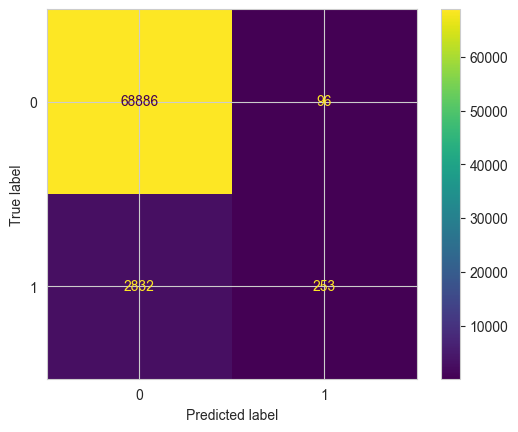

In [82]:
#### Bagging for Naives Bayes models 

from sklearn.ensemble import BaggingClassifier

for name, classifier in NB_models.items():
    
    model = BaggingClassifier(base_estimator=classifier, n_estimators=100, random_state=42)
    
    #fit the model to our data 
    model.fit(x_train, y_train)
    
    '''Calculating all the predicitons'''
    #Prediction for the testing dataset 
    y_pred = model.predict(x_test)
    #Prediction for the training dataset 
    y_pred_train =  model.predict(x_train)
    
    #Confusion matrix for calculation 
    cm = confusion_matrix(y_test, y_pred, labels=labels)

    #hashed because I want to evaluate the models faster, can unhash to see the exact confusion matrixes
    #plot_confusionmatrix(y_pred_train,y_train,dom='Train')
    #plot_confusionmatrix(y_pred,y_test,dom='Test')
    
    #Calculating Expected Value 
    EV = np.sum(cm * cost_matrix)
    
    #Calculatinf other scores for comparision 
    #f1_score = f1_score(y_test, y_pred, average='weighted')
    #Recall = recall_score(y_test, y_pred)
    #Precision= precision_score(y_test, y_pred)
    
    print("TEST ACCURACY ",name," is :", accuracy_score(y_test, y_pred))
    print("TRAIN ACCURACY",name," is :", accuracy_score(y_train, y_pred_train))
    print("EXPECTED VALUE ",name," is :", EV)
    print("___________________________")
    #print("F-1 SCORE ",name," is :", f1_score)
    #print("RECALL ",name," is :", Recall)
    #print("PRECISION ",name," is :", Precision)



# Bagging with Random Forest Classifier 
# Build a Gaussian Classifier
modelMNB = RandomForestClassifier()
modelMNB.fit(x_train, y_train)

#Calculating all the predicitons 
y_pred = modelMNB.predict(x_test)
y_pred_train =  modelMNB.predict(x_train)

#Calculating accuracy 
mnb_train_accuracy = accuracy_score(y_train, modelMNB.predict(x_train))
mnb_test_accuracy = accuracy_score(y_test, modelMNB.predict(x_test))

#Confusion matrix 
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();
#plot_confusionmatrix(y_pred_train,y_train,dom='Train')
#plot_confusionmatrix(y_pred,y_test,dom='Test')

#Calculating Expected Value 
EV_MNB = np.sum(cm * cost_matrix)

print("Train accuracy of RandomForest algo: ", mnb_train_accuracy)
print("Test accuracy of RandomForest algo: ", mnb_test_accuracy)
print("Expected Value of RandomForest algo: ", EV_MNB)



#### Boosting

In [83]:
#Adaboost for all our models 
from sklearn.ensemble import AdaBoostClassifier

for name, classifier in models_dict.items():
    
    model = AdaBoostClassifier(base_estimator=classifier, n_estimators=100, random_state=42)
    
    #fit the model to our data 
    model.fit(x_train, y_train)
    
    '''Calculating all the predicitons'''
    #Prediction for the testing dataset 
    y_pred = model.predict(x_test)
    #Prediction for the training dataset 
    y_pred_train =  model.predict(x_train)
    
    #Confusion matrix for calculation 
    cm = confusion_matrix(y_test, y_pred, labels=labels)

    #hashed because I want to evaluate the models faster, can unhash to see the exact confusion matrixes
    #plot_confusionmatrix(y_pred_train,y_train,dom='Train')
    #plot_confusionmatrix(y_pred,y_test,dom='Test')
    
    #Calculating Expected Value 
    EV = np.sum(cm * cost_matrix)
    
    #Calculatinf other scores for comparision 
    #f1_score = f1_score(y_test, y_pred, average='weighted')
    #Recall = recall_score(y_test, y_pred)
    #Precision= precision_score(y_test, y_pred)
    
    print("TEST ACCURACY ",name," is :", accuracy_score(y_test, y_pred))
    print("TRAIN ACCURACY",name," is :", accuracy_score(y_train, y_pred_train))
    print("EXPECTED VALUE ",name," is :", EV)
    print("___________________________")
    #print("F-1 SCORE ",name," is :", f1_score)
    #print("RECALL ",name," is :", Recall)
    #print("PRECISION ",name," is :", Precision)

/Users/pingle/Library/Python/3.8/lib/python/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


TEST ACCURACY  GiniTree_NoEstimators  is : 0.9485617550335105
TRAIN ACCURACY GiniTree_NoEstimators  is : 0.9998513276441379
EXPECTED VALUE  GiniTree_NoEstimators  is : 2007415
___________________________


/Users/pingle/Library/Python/3.8/lib/python/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


TEST ACCURACY  EntropyTree_NoEstimators  is : 0.9486311349161197
TRAIN ACCURACY EntropyTree_NoEstimators  is : 0.9998513276441379
EXPECTED VALUE  EntropyTree_NoEstimators  is : 2008225
___________________________


/Users/pingle/Library/Python/3.8/lib/python/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


TEST ACCURACY  ExtraTrees_Gini  is : 0.9585247061761971
TRAIN ACCURACY ExtraTrees_Gini  is : 0.9998513276441379
EXPECTED VALUE  ExtraTrees_Gini  is : 2052155
___________________________


/Users/pingle/Library/Python/3.8/lib/python/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Train accuracy of XGBoost algo:  0.9743510451666617
Test accuracy of XGBoost algo:  0.9582055587161946
Expected Value of XGBoost algo:  2046045


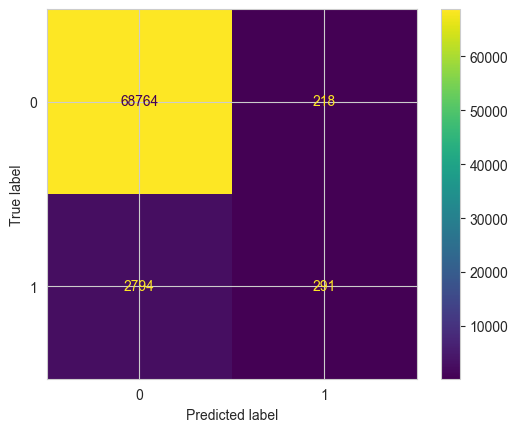

In [11]:
#XGBoost 
import xgboost as xgb

# Build a Gaussian Classifier
modelXG = xgb.XGBClassifier(n_estimators=100, max_depth=10, random_state=42, 
                                 booster='gbtree', subsample=0.8, colsample_bytree=0.8)
modelXG.fit(x_train, y_train)

#Calculating all the predicitons 
y_pred = modelXG.predict(x_test)
y_pred_train =  modelXG.predict(x_train)

#Calculating accuracy 
mnb_train_accuracy = accuracy_score(y_train, modelXG.predict(x_train))
mnb_test_accuracy = accuracy_score(y_test, modelXG.predict(x_test))

#Confusion matrix 
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();
#plot_confusionmatrix(y_pred_train,y_train,dom='Train')
#plot_confusionmatrix(y_pred,y_test,dom='Test')

#Calculating Expected Value 
EV_MNB = np.sum(cm * cost_matrix)

print("Train accuracy of XGBoost algo: ", mnb_train_accuracy)
print("Test accuracy of XGBoost algo: ", mnb_test_accuracy)
print("Expected Value of XGBoost algo: ", EV_MNB)


##  Data analysis - SMOTE sampling 

In order to remove the discrepancy of oversampling of 0. 0 forms 95% of the dataframe, therefore stratified accuracy is high before we even start sampling. Therefore, we are using smote sampling going forward

In [15]:
pip install imbalanced-learn


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [16]:
from imblearn.over_sampling import SMOTE


# Creating a SMOTE object
smote = SMOTE()

# Generating the oversampled dataset
x_smote, y_smote = smote.fit_resample(x, y)

# You can now create a new DataFrame from X_smote and y_smote
df_balanced = pd.DataFrame(x_smote, columns=x.columns)
df_balanced['Crime_Cat_new'] = y_smote


In [17]:
df_balanced.Crime_Cat_new.value_counts()

Crime_Cat_new
0    230239
1    230239
Name: count, dtype: int64

In [18]:
# Save the subsets to separate CSV files
df_balanced.to_csv('df_balanced.csv', index=False)
